# 锂电池故障诊断实验报告

工作内容：
1. 数据集预处理
2. 特征工程
3. 数据集划分
4. 模型学习
    - 逻辑回归
    - KNN
    - SVM
    - 分类树
    - BP神经网络
    - LightGBM
5. 测试集打分及模型评估
6. 模型参数优化
7. 验证集打分及模型评估


首先导入依赖库

In [2]:
import collections
from collections import Counter
#import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. 数据集预处理
本节首先导入数据集特征变量`dateset_x`和分类标签`dataset_y`，首先要查看样本集的特征变量数和分类标签数，观查其统计信息。

In [3]:
dx = pd.read_csv('dataset_x.csv')
dy = pd.read_csv('dataset_y.csv')
dx.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,0.27,0.004890,0.000452,0.000225,0.000167,0.458525,0.376961,0.297505,0.349314,3.290282,2.593152,2.05231,2.210347
1,0.79,0.005739,0.000530,0.000264,0.000195,0.244060,0.179577,0.138177,0.150171,3.290282,2.593152,2.05231,2.210347
2,0.92,0.004962,0.000459,0.000228,0.000169,0.200394,0.145153,0.111824,0.121914,3.290282,2.593152,2.05231,2.210347
3,0.72,0.005411,0.000500,0.000249,0.000184,0.246860,0.181109,0.147447,0.156948,3.290282,2.593152,2.05231,2.210347
4,0.28,0.005297,0.000489,0.000244,0.000180,0.468591,0.382720,0.308075,0.358303,3.290282,2.593152,2.05231,2.210347


In [4]:
dy.head()

,Y1,Y2,Y3
0,1,0,0
1,0,0,0
2,1,1,0
3,1,1,0
4,1,1,1


In [5]:
dx.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.576989,0.005398,0.000499,0.000249,0.000184,0.310626,0.239849,0.189574,0.210951,3.290282e+00,2.593152e+00,2.052310e+00,2.210347e+00
std,0.214925,0.000335,0.000031,0.000015,0.000011,0.178094,0.157522,0.123417,0.151695,4.680934e-13,1.265718e-13,9.237517e-14,2.238322e-13
min,0.200000,0.004160,0.000384,0.000192,0.000142,0.171858,0.121024,0.097630,0.104362,3.290282e+00,2.593152e+00,2.052310e+00,2.210347e+00
25%,0.390000,0.005170,0.000478,0.000238,0.000176,0.240449,0.178752,0.140949,0.152476,3.290282e+00,2.593152e+00,2.052310e+00,2.210347e+00
50%,0.580000,0.005395,0.000499,0.000248,0.000184,0.261256,0.195654,0.153865,0.166563,3.290282e+00,2.593152e+00,2.052310e+00,2.210347e+00
75%,0.760000,0.005619,0.000519,0.000259,0.000191,0.288961,0.218115,0.172012,0.186098,3.290282e+00,2.593152e+00,2.052310e+00,2.210347e+00
max,0.950000,0.006661,0.000616,0.000307,0.000227,1.637694,1.403971,1.099346,1.319770,3.290282e+00,2.593152e+00,2.052310e+00,2.210347e+00


这里发现一件事情，V10、V11、V12、V13变量下数据完全相同，所以这四列被剔除，以降低输入维度。

In [8]:
dy.describe()

,Y1,Y2,Y3
count,10000.000000,10000.000000,10000.000000
mean,0.503800,0.508000,0.500500
std,0.500011,0.499961,0.500025
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


这里也可以看出，样本分布是较为均匀的，各类单一故障均占1/2。但是我还想看一下他们的组合关系。

d:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
d:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


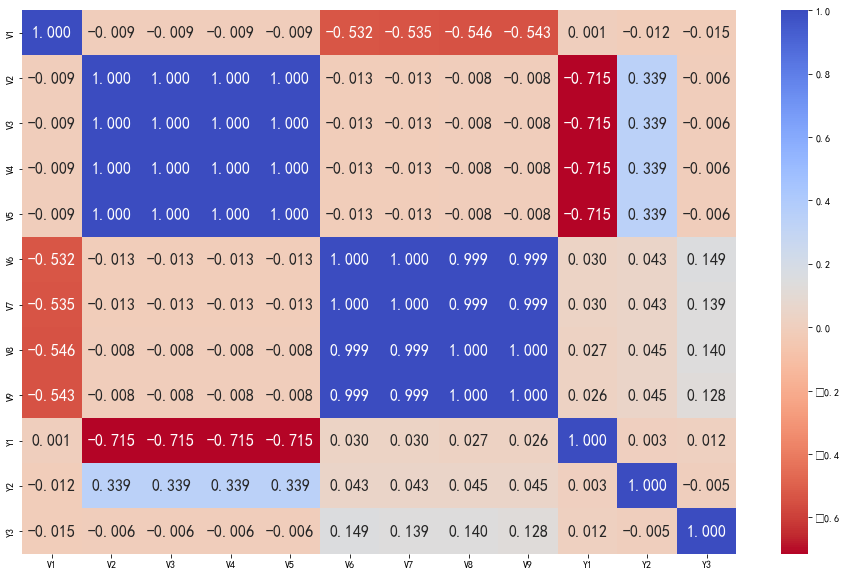

In [20]:
dORobust = pd.read_csv('dateset.csv')

df_corr = dORobust.corr()
f=plt.figure(figsize=(16,10))
sns.heatmap(df_corr, cmap='coolwarm_r', annot=True,fmt='.3f',annot_kws={'size':16})
plt.rcParams['font.sans-serif'] = 'SimHei' # 黑体
plt.show()




In [ ]:
a=np.zeros((1,8))
print(a)



[[0. 0. 0. 0. 0. 0. 0. 0.]]
